# Проверка гипотез по увеличению прибыли интрнет-магазина

-------------

<font color='blue'><b>ОПИСАНИЕ ПРОЕКТА</b></font>

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.


__________________________________________________________________________
_______________________
<font color='blue'><b>**ЦЕЛЬ:**</b></font>

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
__________________________________________________________________________
_______________________
<font color='blue'><b>**ОПИСАНИЕ ДАННЫХ:**</b></font>

**Данные файла hypothesis.csv:**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные файла orders.csv:**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Данные файла visitors.csv:**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Загрузим данные и подготовим их к анализу

### Импортируем библиотеки

In [1]:
#!pip install -U seaborn # установка seaborn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from scipy import stats as st
from datetime import datetime, timedelta
# количество отражаемых столбцов при выводе датафрэйма
pd.set_option('display.max_columns', 50) 
# Графики высокого разрешения
%config InlineBackend.figure_format='retina' 
%matplotlib inline 
#убрать уведомления об ошибках
import warnings
warnings.simplefilter('ignore')

### Загрузим данные из файлов

In [10]:
try:
    hypothesis = pd.read_csv("/datasets/hypothesis.csv")
except:
    hypothesis = pd.read_csv("C:\\Users\dell\\Desktop\\УЧЕБА\\ПРОЕКТ Принятие решений в бизнесе АB\\hypothesis.csv")
    
try:   
    orders = pd.read_csv("/datasets/orders.csv")
except:
    orders = pd.read_csv("C:\\Users\dell\\Desktop\\УЧЕБА\\ПРОЕКТ Принятие решений в бизнесе АB\\orders.csv")

try:   
    visitors = pd.read_csv("/datasets/visitors.csv")
except:
    visitors = pd.read_csv("C:\\Users\dell\\Desktop\\УЧЕБА\\ПРОЕКТ Принятие решений в бизнесе АB\\visitors.csv")

### Изучим детально данные каждого датафрейма в разрезе каждого столбца

In [11]:
# напишем функцию 
def get_info_about_df(data):
    """
    Приводит наименование столцов к нижнему регстру и убирает пробелы заменяя их на "_"
    выводит по DF:
    - количество строк-дупликатов ;
    - 5 рандомных строк;
    - Основные статистические данные;
    - Типы данных и наличеие нулевых значений.
    выводит по каждому столбцу DF:
    - Количество Null и Na;
    - Количество уникальных значений;
    - Список уникальных значений;
    - Количетсво повторений по каждому уникальному значению;
    - Статистические сведения.
    """
    data.columns = data.columns.str.lower()
    data.columns = data.columns.str.replace(' ','_')
    
    print(f'\033[1mDATAFRAME INFO:\033[0m\n')
    
    print(f'DUPLICATE ROWS COUNT = {data.duplicated().sum()}\n')
    
    print('\033[1mRANDOM FIVE ROWS\033[0m')
    display(data.sample(5))
    print('*'*70)
    
    print('\033[1mSTATISTIC INFO\033[0m')
    display(data.describe())
    print('*'*70)
    
    print('\033[1mINFO ABOUT DATA TYPES AND PRESENCE NULL \033[0m')
    display(data.info())
    print('*'*70)
    
    for col in data.columns:
        column=data[col]
        print(f'\033[1mCOLUMN - {col}\033[0m')
        print(f'Null, Na in {col}: {column.isna().sum()}')
        print(f'Unique values: {column.nunique()}')
        print(f'List for unique values and it amount :\n{column.unique()}')
        
        print(column.value_counts())
        print(f'Statistic info:\n{column.describe()}')
       
        print('*'*70)

#### **DateFrame - hypothesis**

In [ ]:
get_info_about_df(hypothesis)

#### **DateFrame - orders**

In [15]:
get_info_about_df(orders)

DATAFRAME INFO:

DUPLICATE ROWS COUNT = 0

RANDOM FIVE ROWS


,transactionid,visitorid,date,revenue,group
166,2830055340,2303470071,2019-08-22,436,A
766,178265899,433951253,2019-08-07,5490,B
420,2788225284,1606766439,2019-08-06,37550,B
1035,2898835960,3972127743,2019-08-09,8439,A
1143,3551685910,2397025226,2019-08-13,910,B


**********************************************************************
STATISTIC INFO


,transactionid,visitorid,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


**********************************************************************
INFO ABOUT DATA TYPES AND PRESENCE NULL 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

**********************************************************************
COLUMN - transactionid
Null, Na in transactionid: 0
Unique values: 1197
List for unique values and it amount :
[3667963787 2804400009 2961555356 ... 1807773912 1947021204 3936777065]
3667963787    1
4167421281    1
2875229767    1
504373597     1
2017680897    1
             ..
1853288890    1
2084190534    1
2956594374    1
3646798055    1
3936777065    1
Name: transactionid, Length: 1197, dtype: int64
Statistic info:
count    1.197000e+03
mean     2.155621e+09
std      1.229085e+09
min      1.062393e+06
25%      1.166776e+09
50%      2.145194e+09
75%      3.237740e+09
max      4.293856e+09
Name: transactionid, dtype: float64
**********************************************************************
COLUMN - visitorid
Null, Na in visitorid: 0
Unique values: 1031
List for unique values and it amount :
[3312258926 3642806036 4069496402 ...  370388673  573423106 2108080724]
4256040402    11
2458001652    11
2378935119    

In [16]:
# проверим наличиеи дубликатов userid которые могли попсчать одновременно в 2 группы
arr = orders.groupby(['visitorid','group'], as_index=False).agg({'transactionid':'nunique','revenue':'sum'})
a= arr[arr['group']=='A']
b= arr[arr['group']=='B']

ab = list(a.merge(b, left_on='visitorid', right_on='visitorid', how="inner")['visitorid'])
s = arr[arr['visitorid'].isin(ab)]['revenue'].sum()
c= arr[arr['visitorid'].isin(ab)]['transactionid'].sum()
pc=c/arr.transactionid.sum()*100
ps=s/arr.revenue.sum()*100
print('Найдено {} userid которые одновременно попали в группу А и В'.format(len(ab)))
print('Количество заказов(суммарно в 2х группах) {} шт. ({:.2f}%), на суммму {} руб. ({:.2f}%)'.format(c, pc, s, ps))

Найдено 58 userid которые одновременно попали в группу А и В
Количество заказов(суммарно в 2х группах) 181 шт. (15.12%), на суммму 1558935 руб. (15.60%)


#### **DateFrame - visitors**

In [17]:
get_info_about_df(visitors)

DATAFRAME INFO:

DUPLICATE ROWS COUNT = 0

RANDOM FIVE ROWS


,date,group,visitors
29,2019-08-30,A,490
55,2019-08-25,B,679
3,2019-08-04,A,717
17,2019-08-18,A,668
52,2019-08-22,B,650


**********************************************************************
STATISTIC INFO


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


**********************************************************************
INFO ABOUT DATA TYPES AND PRESENCE NULL 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

**********************************************************************
COLUMN - date
Null, Na in date: 0
Unique values: 31
List for unique values and it amount :
['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']
2019-08-01    2
2019-08-17    2
2019-08-30    2
2019-08-29    2
2019-08-28    2
2019-08-27    2
2019-08-26    2
2019-08-25    2
2019-08-24    2
2019-08-23    2
2019-08-22    2
2019-08-21    2
2019-08-20    2
2019-08-19    2
2019-08-18    2
2019-08-16    2
2019-08-02    2
2019-08-15    2
2019-08-14    2
2019-08-13    2
2019-08-12    2
2019-08-11    2
2019-08-10    2
2019-08-09    2
2019-08-08    2
2019-08-07    2
2019-08-06 

#### Выводы

- данные в orders и visitors предоставлены за одинаковый период с 01.08.2019 по 31.08.2019;
- есть дубли по userid, которые оновременно есть в двух группах - так как их объем превышает 15 % от всех данных, удалять их не будем;
- Столбцы с датами имеют формат данных object, поэтому необходимо заменить их на тип datatime, а так же определим период за который предоставлены данные;

### Проведем предобработку данных

In [18]:
orders['date'] = orders['date'].astype('datetime64[D]')
orders['date'] = orders['date'].map(lambda x: datetime.strftime(x, '%Y-%m-%d'))
print('\nМин. дата {}, Макс. дата {}\n'.format(orders['date'].min(), orders['date'].max()))
orders['date'] = orders['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
orders.info()
orders.head()


Мин. дата 2019-08-01, Макс. дата 2019-08-31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [19]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors['date'] = visitors['date'].map(lambda x: datetime.strftime(x, '%Y-%m-%d'))
print('\nМин. дата {}, Макс. дата {}\n'.format(visitors['date'].min(), visitors['date'].max()))
visitors['date'] = visitors['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
visitors.info()
visitors.head()


Мин. дата 2019-08-01, Макс. дата 2019-08-31

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Периоды совпадают, типы преобразованы - выгрузки готовы к использованию в анализе

## Приоритизация гипотез

Еще раз посмотрим на 9 гипотез по увеличению выручки интернет-магазина с указанными параметрам

In [20]:
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Фреймворк ICE

In [21]:
hypothesis['ice'] = round(hypothesis.impact*hypothesis.confidence/hypothesis.efforts,0)
hypothesis[['hypothesis','ice']].sort_values('ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день...",16.0
0,"Добавить два новых канала привлечения трафика,...",13.0
7,Добавить форму подписки на все основные страни...,11.0
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
3,"Изменить структура категорий, что увеличит кон...",1.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.0


### Фреймворк RICE

In [22]:
hypothesis['rice'] = round(hypothesis.reach*hypothesis.impact*hypothesis.confidence/hypothesis.efforts,0)
hypothesis[['hypothesis','rice']].sort_values('rice', ascending=False)

,hypothesis,rice
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.0
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


### Вывод

Перспективными являются гипотезы:
- По фреймворку ICE: 8, 0, 7 и 6;
- По фреймворку RICE: 7, 2, 0 и 6.

Перспективнрсть гипотез отличаются по расчетам 2-х фреймворка, изменение позиций переспективности связано с тем, что при приоритизации через фреймворк Ice мы не учитывали очень важный показатель, а именно как много будет затронуто пользователей/потребителей (reach) при внесении изменений, который учтен в RICE, поэтому для нас приоритетными являются гипотезы: 7, 2, и 0

In [23]:
display(hypothesis[['hypothesis','ice','rice']].sort_values(['rice', 'ice'], ascending=False))

,hypothesis,ice,rice
7,Добавить форму подписки на все основные страни...,11.0,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",13.0,40.0
6,Показать на главной странице баннеры с актуаль...,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.0,16.0
3,"Изменить структура категорий, что увеличит кон...",1.0,9.0
1,"Запустить собственную службу доставки, что сок...",2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0,3.0


## Анализ A/B-теста

### Проверка размера выборки и есть ли разница между ними

In [24]:
# Определим количество посететилей в разрезе групп
a = visitors[visitors['group']=="A"]
b = visitors[visitors['group']=="B"]
print('Количество посетителей:\nГруппа А: {}\nГруппа В: {}\n'
      .format(a['visitors'].sum(),b['visitors'].sum()))

Количество посетителей:
Группа А: 18736
Группа В: 18916



In [25]:
# Определим количество покупок в разрезе групп
purchasesA = len(orders[orders['group']=='A'])
purchasesB = len(orders[orders['group']=='B'])
print('Количество покупок:\nГруппа А: {}\nГруппа В: {}\n'.format(purchasesA, purchasesB))


Количество покупок:
Группа А: 557
Группа В: 640



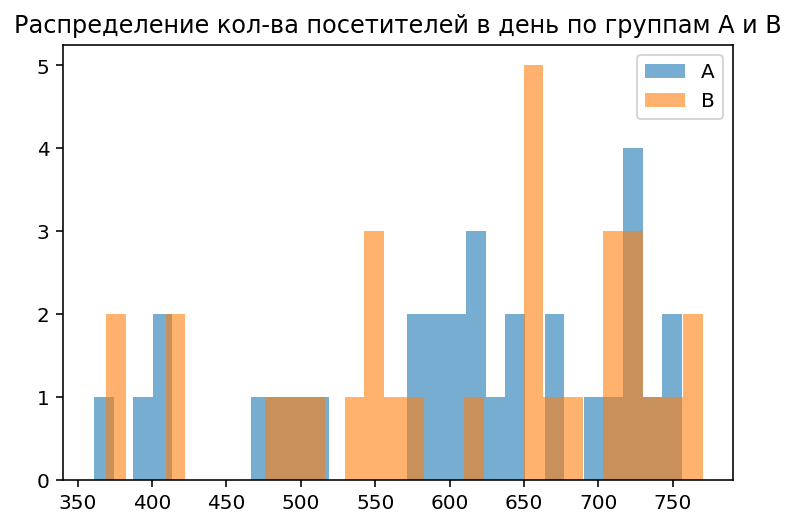

In [26]:
# Построим распределение кол-ва посетителей в день по группам A и B
plt.hist(a['visitors'], label="A", alpha = 0.6,bins=30)
plt.hist(b['visitors'], label="B", alpha = 0.6,bins=30)
plt.legend()
plt.title('Распределение кол-ва посетителей в день по группам A и B')
plt.show()

In [27]:
# Расчет конверсий
a_conversion = purchasesA/a['visitors'].sum()
b_conversion = purchasesB/b['visitors'].sum()
print('\nКонверсия начальная: {:.3f}\nКонверсия после изменения: {:.3f}\nОтносительное изменение конверсии: {:.3f}'
      .format(a_conversion, b_conversion, abs(1-a_conversion/b_conversion)))


Конверсия начальная: 0.030
Конверсия после изменения: 0.034
Относительное изменение конверсии: 0.121


In [28]:
# Определим минимальный размер выборки для определения относительного различия между группами,
# на которой будет заметно изменение показателя, если оно есть.
print(f'\nНа сайте: http://www.evanmiller.org/ab-testing/sample-size.html для расчета минимального размера выборки укажем:')
print(f'Baseline conversion rate = {a_conversion*100:.2f}%')
print(f'Minimum Detectable Effect = {abs(1-a_conversion/b_conversion)*100:.3f}%')
print(f'Statistical power 1−β = 80%')
print(f'Significance level α = 5%\n')
print('Расчет показал, что для корректного проведения тестирования - необходимый объем выборки должен составлять не менее 35445.')
print('Наша выборка = {}, а значит что вазмер выборки подобран корректно.'.format(visitors['visitors'].sum()))


На сайте: http://www.evanmiller.org/ab-testing/sample-size.html для расчета минимального размера выборки укажем:
Baseline conversion rate = 2.97%
Minimum Detectable Effect = 12.133%
Statistical power 1−β = 80%
Significance level α = 5%

Расчет показал, что для корректного проведения тестирования - необходимый объем выборки должен составлять не менее 35445.
Наша выборка = 37652, а значит что вазмер выборки подобран корректно.


### Построим график кумулятивной выручки по группам.

In [29]:
# Список уникальных пар дата/группа по датафрейму заказов
datesGroups = orders[['date', 'group']].drop_duplicates()

In [30]:
# Получим таблицу с куммулятивными значениями (с накоплением на каждый день и по группе)
# для таблицы orders сумма дохода накопитально на каждую дату по каждой группе уникальных пар
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date': 'max',
          'group': 'max',
          'transactionid':'nunique',
          'visitorid': 'nunique',
          'revenue': 'sum',})
    ,axis=1,).sort_values(by=['date', 'group'])
# для таблицы visitors количество посещений накопитально на каждую дату по каждой группе
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date']<=x['date'],visitors['group']==x['group'])]
    .agg({'date':'max',
          'group':'max',
          'visitors':'sum'})
    ,axis=1).sort_values(by=['date','group'])

In [31]:
# Объеденим данные  с куммулятивными значениями
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']) 
cumulativeData.columns =['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData.head(5)) 
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A']
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B']

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


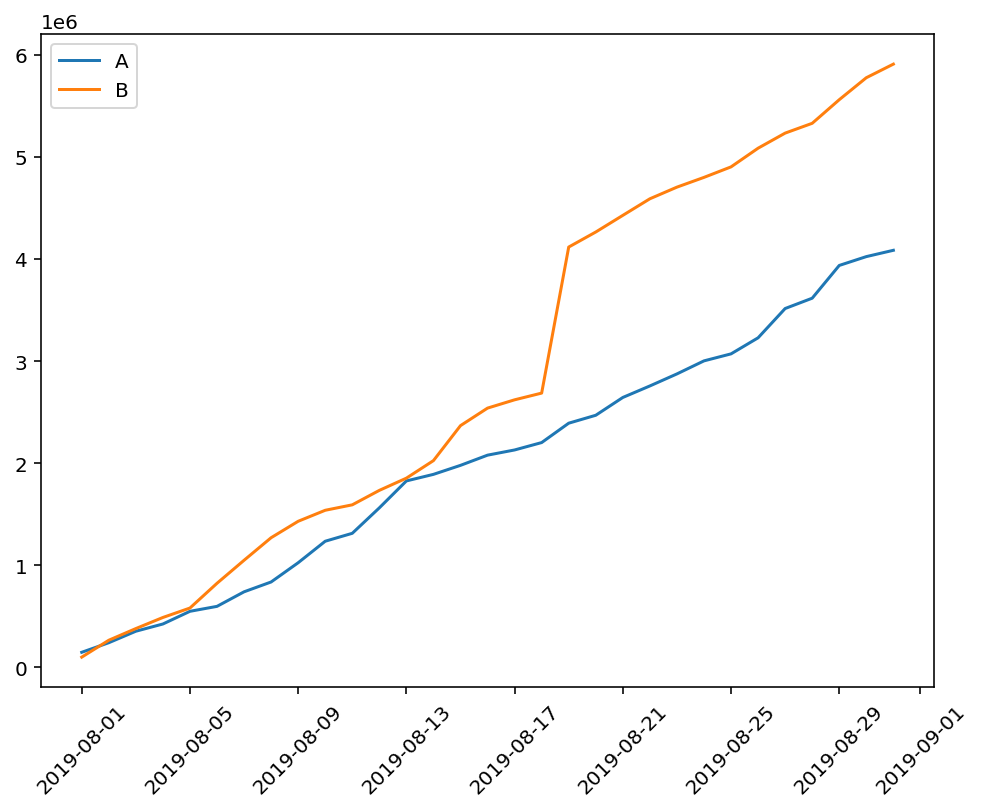

In [32]:
plt.figure(figsize=(8, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.legend() 

#### Выводы и предположения

Из графика видно:
- выручка росла в течении всего периода проведения теста. 
- выручка В показывает стабильно большую прибыль. 
- есть несколько точек со скачками, можно предположить, что в эти дни или увеличивалось количество заказов или были "крупные" заказы.

### Построим график кумулятивного среднего чека по группам.

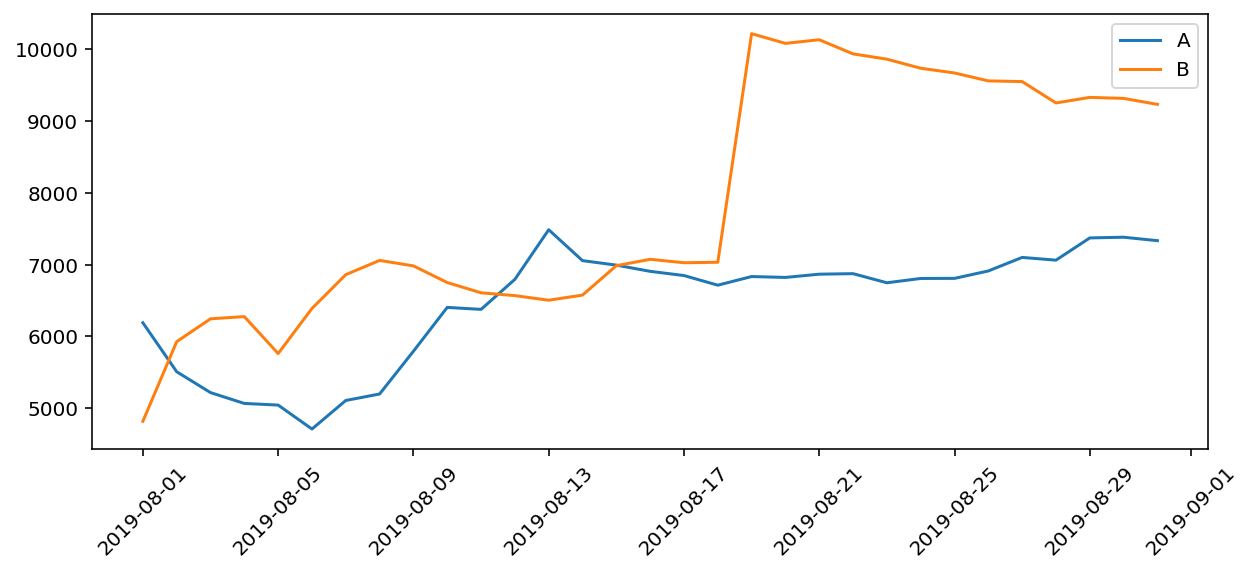

In [33]:
# Строим график среднего чека группы А
plt.figure(figsize=(10,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# Строим график среднего чека группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend() 

#### Выводы и предположения

Из графика видно:
- средний чек рос, при этом есть скачки для группы В.
- для группы В заметен рост среднего чека (17 число), воможно в этот день были более крупные заказы.
- средний чек для группы А к концу периода немного выровнялся, а вот для группы В из-за роста 17 числа, необходимо скорее всего больше времени для того, чтобы выровняться и прийти к более реальному среднему.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

,date,groupA,ordersA,buyersA,revenueA,visitorsA,groupB,ordersB,buyersB,revenueB,visitorsB
0,2019-08-01,A,24,20,148579,719,B,21,20,101217,713
1,2019-08-02,A,44,38,242401,1338,B,45,43,266748,1294
2,2019-08-03,A,68,62,354874,1845,B,61,59,380996,1803
3,2019-08-04,A,84,77,425699,2562,B,78,75,489567,2573
4,2019-08-05,A,109,100,549917,3318,B,101,98,581995,3280


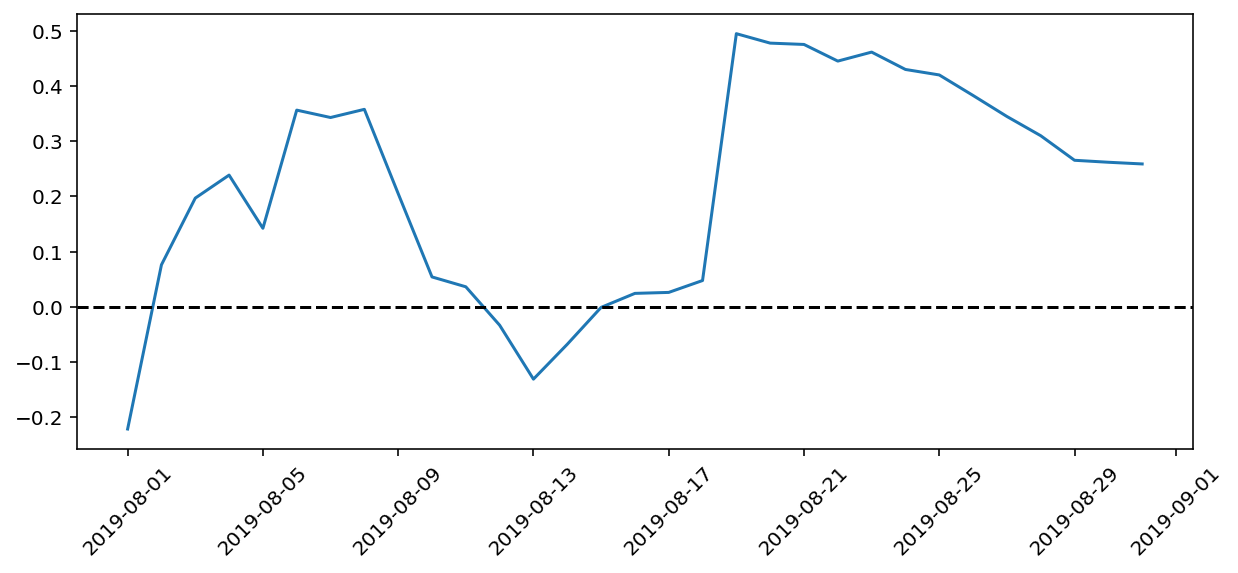

In [34]:
# Объеденим данные
mergedCumulativeRevenue  = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
display(mergedCumulativeRevenue.head())
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--') 

#### Выводы и предположения

Из графика видно есть несколько скачков и один очень большой, соответсвенно есть аномальные значения  которые оказывают влияние. Определим выброс позже.


### Построим график кумулятивной конверсии по группам.

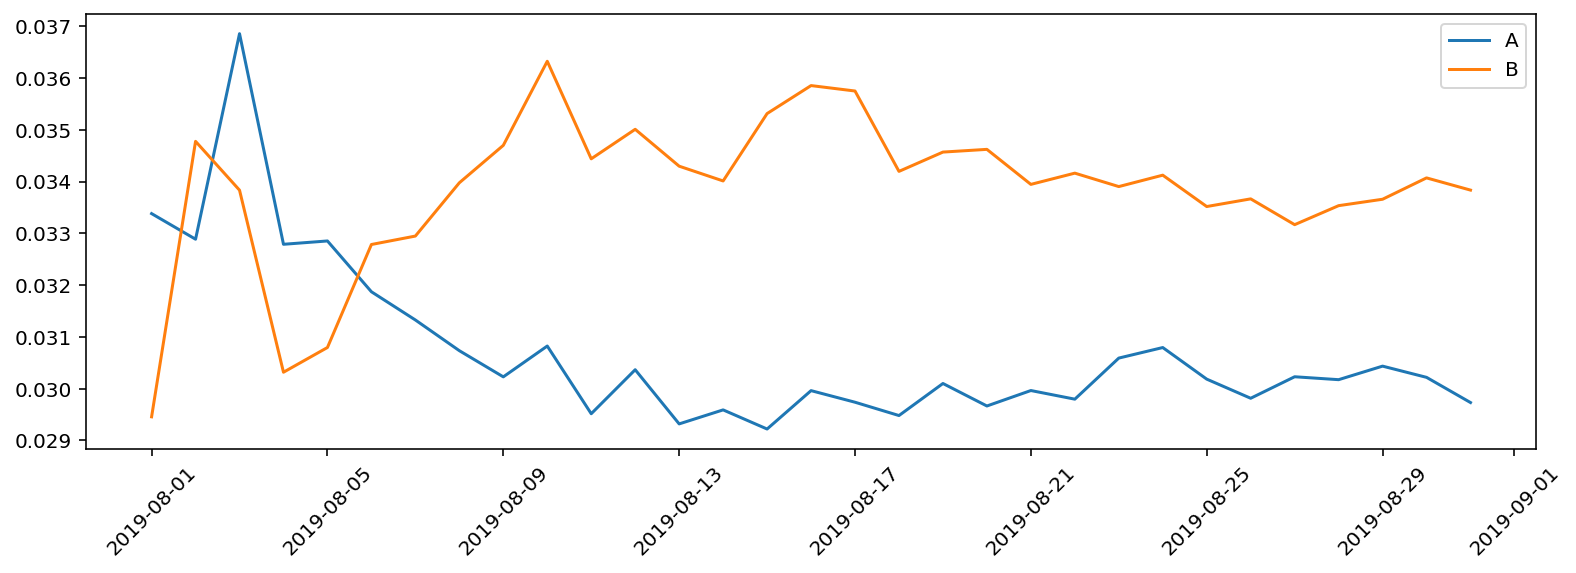

In [35]:
cumulativeData['conversion'] =  cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=="A"]
cumulativeDataB = cumulativeData[cumulativeData['group']=="B"]
# строим графики
plt.figure(figsize=(13,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()

#### Выводы и предположения

Графики получились похожие, но колебания в группе В более сильные, Первые пять дней конверсия группы А была больше, чем в группе В, но прия этом дальше дальше группа В показывала более высокую конверсию

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833


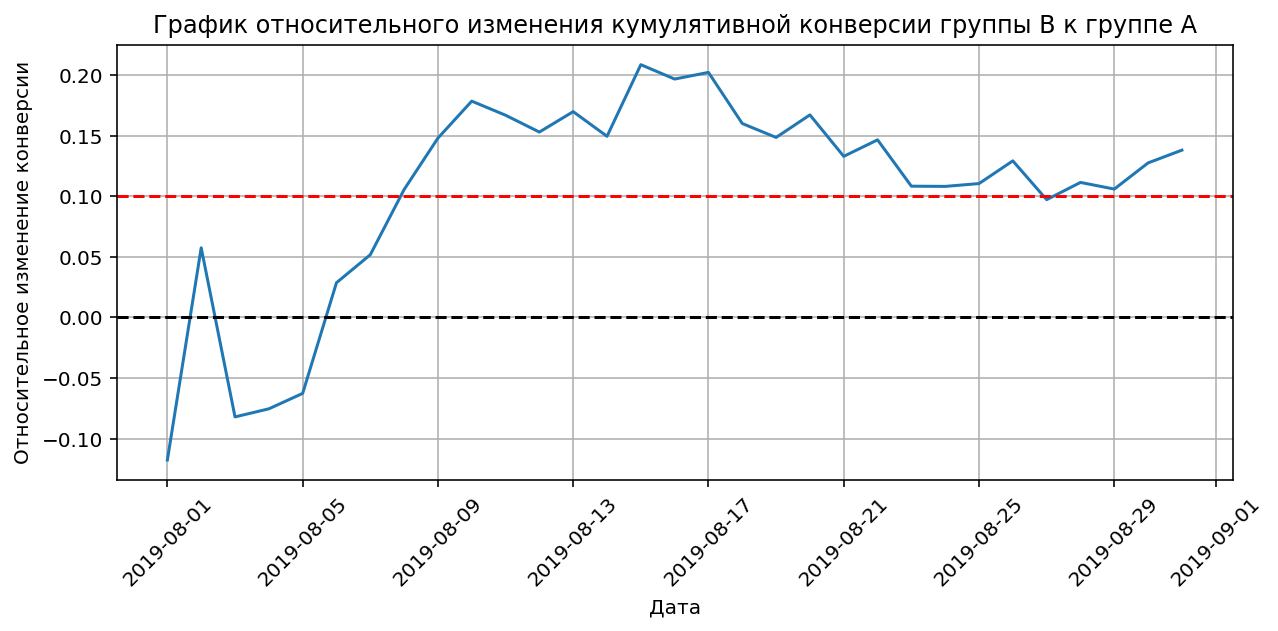

In [36]:
mergedCumulativeConversions =  cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', right_on='date', suffixes=['A', 'B'])
display(mergedCumulativeConversions.head(3))
plt.figure(figsize=(10,4))
plt.plot(mergedCumulativeConversions['date'],mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1)
plt.xticks(rotation=45)
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A")
plt.xlabel('Дата')
plt.ylabel('Относительное изменение конверсии')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='red', linestyle='--')

#### Выводы и предположения

В начале периода конверсия группы А была выше чем у группы В, но только в 1 неделю, с начала второй недели конверсия группы В уже была выше на 20% на протяжении 2-х недель, на последней неделе периода конверсия В выше А на 10%. В целом видно, что конверсия не установилась и делать выводы рано, нужнно проверить исключив аномалии.

### Построим точечный график количества заказов по пользователям.

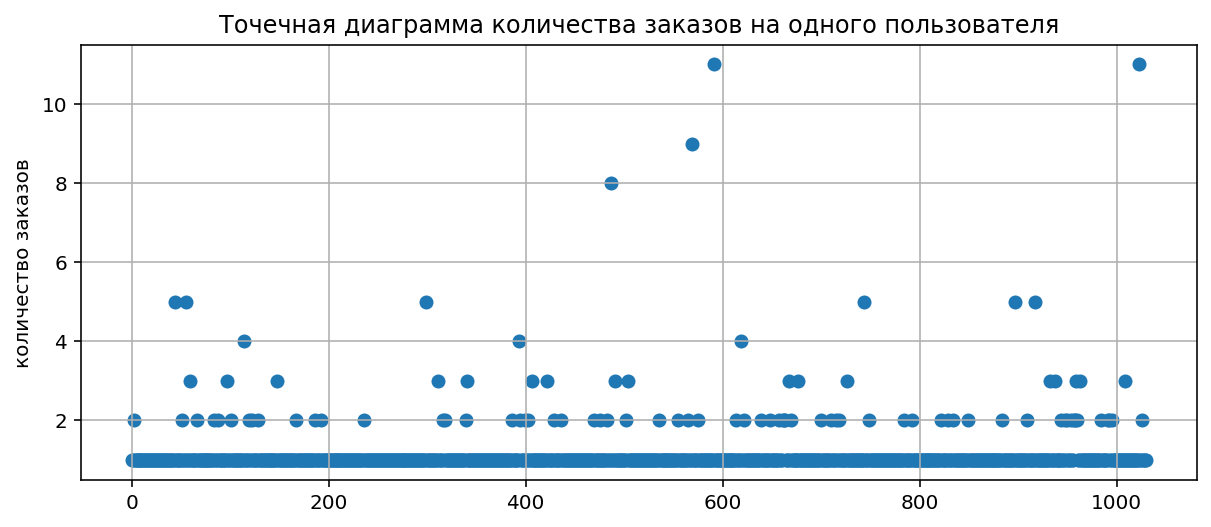

In [37]:
# получим таблицу с наименование уникальных пользователей и с количетсвом совершенных заказов
ordersByUsers = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10,4))
plt.title("Точечная диаграмма количества заказов на одного пользователя")
plt.ylabel('количество заказов')
plt.grid()
plt.scatter(x_values , ordersByUsers['orders']) 

#### Выводы и предположения

Большинство пользователей не совершают больше 3-х заказов, при этом есть пользователи которые совершили заказы в колиетсве 4 - 11 штук, и не понятно что считать выбросами.

In [38]:
arr = list(np.percentile(ordersByUsers['orders'], [95, 99]))
print('Перцентили:\n95: {}\n99: {}\n'.format(arr[0],arr[1]))
print('Не более 5% пользователей оформляли больше чем {} и не более 1% оформляли больше чем {} заказов.\nвыберем {} за границу числа заказов.'
      .format(arr[0],arr[1],arr[1]))

Перцентили:
95: 2.0
99: 4.0

Не более 5% пользователей оформляли больше чем 2.0 и не более 1% оформляли больше чем 4.0 заказов.
выберем 4.0 за границу числа заказов.


### Построим точечный график стоимостей заказов.

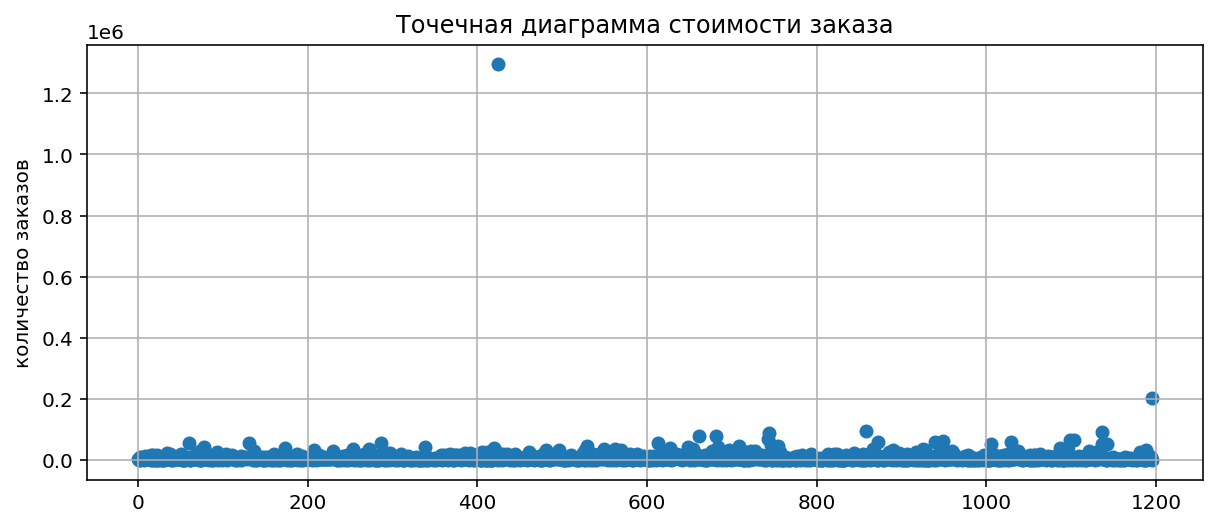

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,4))
plt.title("Точечная диаграмма стоимости заказа")
plt.ylabel('количество заказов')
plt.grid()
plt.scatter(x_values , orders['revenue']) 

На графике видно что стоимость заказов не превышеат 100 тысяч, но при этом есть два очень выделяющих заказа, стоимость одного - 200 тыс.руб., а второго около 1,2 млн.руб. Эти значения аномальны. Построим точечную диграмму с диапазоном до 150 тысю.руб.

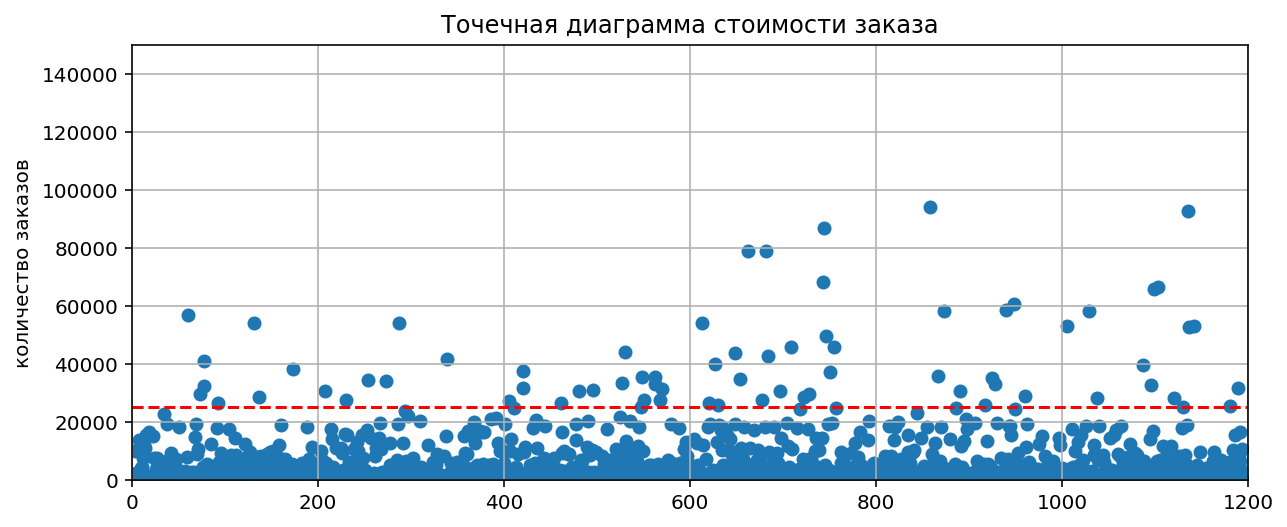

In [40]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,4))
plt.title("Точечная диаграмма стоимости заказа")
plt.ylabel('количество заказов')
plt.axhline(y=25000, color='red', linestyle='--')
plt.axis([0, 1200, 0, 150000])
plt.grid()
plt.scatter(x_values , orders['revenue']) 

#### Выводы и предположения

По второму графику уже видно, что основная масса пользователей совершает заказы на сумму не привышающию 30 тыс. руб., но так же есть заказы сумма которых составляют 30+ тыс.руб. и мы помним о тех аномальных значениях

In [41]:
arr = list(np.percentile(orders['revenue'], [95, 99]))
print('Перцентили:\n95: {:.0f}\n99: {:.0f}\n'.format(arr[0],arr[1]))
print('Не более 5% пользователей оформляли заказы на сумму больше чем {:.0f} и не более 1% больше чем {:.0f} заказов.\nВыберем {:.0f} за границу стоимости заказа.'
      .format(arr[0],arr[1],arr[1]))

Перцентили:
95: 28000
99: 58233

Не более 5% пользователей оформляли заказы на сумму больше чем 28000 и не более 1% больше чем 58233 заказов.
Выберем 58233 за границу стоимости заказа.


### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [42]:
# группировка данных по userid которые совершили хотябы 1 заказ для каждой группы
ordersByUsersA= (orders[orders['group']=="A"]
                .groupby('visitorid', as_index=False)
                .agg({'transactionid':'nunique'}))
ordersByUsersA.columns=['visitorid','orders']

ordersByUsersB= (orders[orders['group']=="B"]
                .groupby('visitorid', as_index=False)
                .agg({'transactionid':'nunique'}))
ordersByUsersB.columns=['visitorid','orders']

In [43]:
print('Кол-во покупателей в группе A: {}'.format(len(ordersByUsersA)))
print('Кол-во покупок в группе А: {}'.format(ordersByUsersA['orders'].sum()))
print('Кол-во посетителей в группе A: {}\n'.format(visitors[visitors['group']=='A']['visitors'].sum()))
print('Кол-во покупателей в группе B: {}'.format(len(ordersByUsersB)))
print('Кол-во покупок в группе B: {}'.format(ordersByUsersB['orders'].sum()))
print('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))

Кол-во покупателей в группе A: 503
Кол-во покупок в группе А: 557
Кол-во посетителей в группе A: 18736

Кол-во покупателей в группе B: 586
Кол-во покупок в группе B: 640
Кол-во посетителей в группе B: 18916


In [44]:
# необходимо исчключить визиты тех кто уже совершил заказы и для оставшихся установить кол-во закзов = 0
# создадим список индексов для групп А и В всех визитов которые не делали заказы
list_orders_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
list_orders_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)

In [45]:
# создадим Series на основании списков
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')    
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')
# Объеденим с полученными ранее количеством заказов и series выше
sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)

сформулируем гипотезы

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Статистическая значимость различий в конверсии между группами А и В, по сырым данным, ЕСТЬ.}\\
   H_1 :\text{Статистическая значимость различий в конверсии между группами А и В, по сырым данным,  НЕТ..}
 \end{cases}
\end{equation*}$

In [46]:
#проведем проверку гипотез
print('\nОтносительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB)
print('P-value: {:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "сырым" данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По "сырым" данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')


Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.01679
По "сырым" данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [47]:
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


сформулируем гипотезы

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Статистическая значимость различий в среднем чеке между группами А и В, по сырым данным, ЕСТЬ.}\\
   H_1 :\text{Статистическая значимость различий в среднем чеке между группами А и В, по сырым данным,  НЕТ..}
 \end{cases}
\end{equation*}$

In [48]:
print('Относительное изменение среднего чека в группе B по отношению группы A: {:.3f}'.format(
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
print('P-value: {:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По "сырым" данным РАЗНИЦА в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По "сырым" данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!')

Относительное изменение среднего чека в группе B по отношению группы A: 0.259
P-value: 0.72929
По "сырым" данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

In [49]:
# ранее мы определили, что граница для числа заказов составила
limit_orders = 2
# а стоимость
limit_revenue = 58233

In [50]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders']>limit_orders]['visitorid'], 
                                ordersByUsersB[ordersByUsersB['orders']>limit_orders]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue']>limit_revenue]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))

Кол-во аномальных пользователей: 31


сформулируем гипотезы

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Статистическая значимость различий в конверсии между группами А и В, по очищенным данным, ЕСТЬ.}\\
   H_1 :\text{Статистическая значимость различий в конверсии между группами А и В, по очищенным данным,  НЕТ..}
 \end{cases}
\end{equation*}$

In [51]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A
], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B
], axis = 0)
print('\nОтносительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('P-value: {:.5f}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в конверсии групп A и B НЕТ!')


Относительный прирост конверсии группы B по отношению к группе A после очистки данных: 0.174
P-value: 0.01007
По очищенным данным в конверсии групп A и B РАЗНИЦА СТАТИСТИЧЕСКИ ЗНАЧИМА!


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

сформулируем гипотезы

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Статистическая значимость различий в среднем чеке между группами А и В, по очищенным данным, ЕСТЬ.}\\
   H_1 :\text{Статистическая значимость различий в среднем чеке между группами А и В, по очищенным данным,  НЕТ..}
 \end{cases}
\end{equation*}$

In [52]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('По очищенным данным РАЗНИЦА в средних чеках в группах A и B СТАТИСТИЧЕСКИ ЗНАЧИМА!')
else:
    print('По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!')

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.020
P-value: 0.7977151576527292
По очищенным данным РАЗЛИЧИЙ в средних чеках в группах A и B НЕТ!


## Решение по результатам теста.

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

По результатам теста:
- есть статистически значимое различие в конверсии между группами по «сырым» данным.
- нет статистически значимого различия в среднем чеке заказа между группами по «сырым» данным.
- есть статистически значимое различие в конверсии между группами по «очищенным» данным.
- нет статистически значимого различия в среднем чеке заказа между группами по «очищенным» данным. 
При этом показатель конверсии в группе А по сырым данным составил 13.8%, а после очистки  17.3, что позволяет на сделать вывод что А/В тест нужно остановить и зафиксировать победу группы В.